# State Discrimination of qubits states

Consider a typical qubit readout IQ scatters.

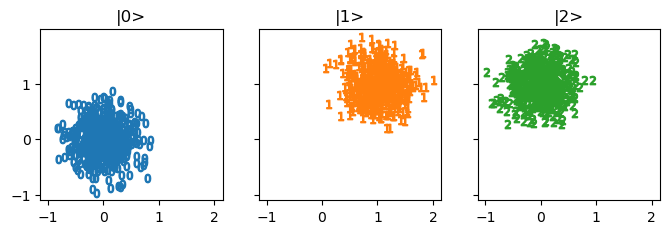

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n_pts = 500
centers = [(0, 0), (1, 1), (0, 1)]
list_points = [np.random.multivariate_normal(center, np.eye(len(centers[0])) * 0.1, n_pts) 
               for center in centers]

fig, axs = plt.subplots(ncols=len(centers), figsize=(8,3), sharex=True, sharey=True)
for i, pts in enumerate(list_points):
    axs[i].scatter(pts[:,0], pts[:,1], marker=f"${i}$", color=f'C{i}')
    axs[i].set_aspect('equal')
    axs[i].set_title(f'|{i}>')

It can be easily handled with the stater discriminator.

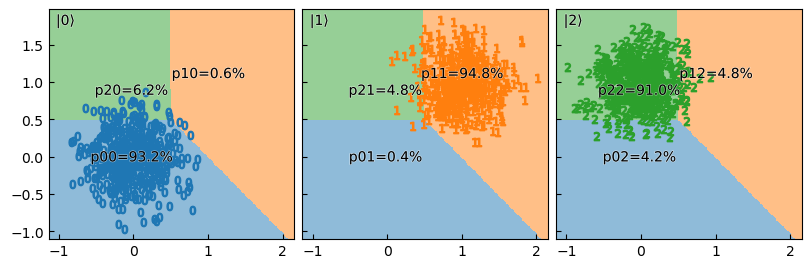

In [2]:
from labcodes.state_disc import NCenter

stater, fig = NCenter.fit(list_points, plot=True)

the `stater` provides a few functions to calculate the state probabilities or label each points.

In [3]:
np.array([stater.probs(pts) for pts in list_points])

array([[0.932, 0.006, 0.062],
       [0.004, 0.948, 0.048],
       [0.042, 0.048, 0.91 ]])

In [4]:
stater.flags(list_points[0])

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Of course one can reconstruct a new state discriminator once they provides the centers.
The discriminating results will be the same.

In [5]:
stater2 = NCenter(centers)  # With ideal centers.
np.array([stater.probs(pts) for pts in list_points])

array([[0.932, 0.006, 0.062],
       [0.004, 0.948, 0.048],
       [0.042, 0.048, 0.91 ]])

Here the state discriminator is based on a simple algorithm implemented by `sklearn`.
It is works well even with poor-quality data.

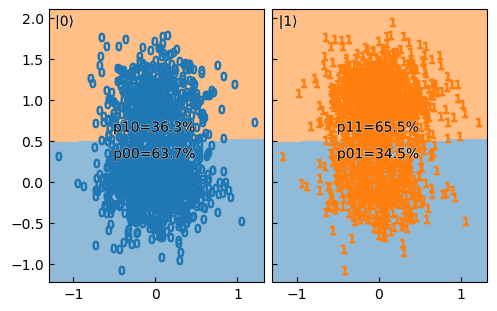

In [6]:
n_pts = 1500
centers = [(0, 0), (0, 1)]
list_points = [np.random.multivariate_normal(center, np.eye(len(centers[0])) * 0.1, n_pts) 
               for center in centers]
list_points[0][-500:] = list_points[1][-500:]
list_points[1][:500] = list_points[0][:500]
stater, fig = NCenter.fit(list_points, plot=True)

# Multiple qubit states

Above we introduced a state discriminator to tell readout reaults for single qubits.

For multiple qubit we want the joint readout results. 
The only thing we need is the single shot flags from each qubit.

See if we have 3 qubit, each has 3 distinguishable states.

In [7]:
from itertools import product
import pandas as pd
from labcodes.state_disc import flags_mq_from_1q, str_from_flags

nlevels = 3
n_qbs = 3
list_flags = np.array(list(product(range(nlevels), repeat=n_qbs))).T
flags_mq = flags_mq_from_1q(list_flags, nlevels)

df = pd.DataFrame({f'q{i}': flags for i, flags in enumerate(list_flags)})
df['flags_mq'] = flags_mq
df['label_mq'] = str_from_flags(flags_mq, n_qbs, nlevels)
df

,q0,q1,q2,flags_mq,label_mq
0,0,0,0,0,000
1,0,0,1,1,001
2,0,0,2,2,002
3,0,1,0,3,010
4,0,1,1,4,011
5,0,1,2,5,012
6,0,2,0,6,020
7,0,2,1,7,021
8,0,2,2,8,022
9,1,0,0,9,100


It is easy to calculate the state probabilities once you have flags for each data points.

In [8]:
from labcodes.state_disc import probs_from_flags
probs_from_flags(flags_mq, nlevels, n_qbs, return_labels=True)

(array([0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
        0.03703704, 0.03703704]),
 array(['000', '001', '002', '010', '011', '012', '020', '021', '022',
        '100', '101', '102', '110', '111', '112', '120', '121', '122',
        '200', '201', '202', '210', '211', '212', '220', '221', '222'],
       dtype='<U3'))

In [9]:
from labcodes.state_disc import flags_from_str, str_from_flags
str_from_flags(3, 2), flags_from_str('111', 2)

(array(['11'], dtype='<U2'), array([7]))